In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

import os
print(os.listdir("."))

['.ipynb_checkpoints', '.gitignore', 'README.md', 'pokemon_alopez247.csv', '.git', 'Project.ipynb']


In [2]:
pokemon = pd.read_csv("./pokemon_alopez247.csv")
pokemon.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [3]:
clean_pokemon = pokemon.drop(columns=['Name','Number', 'Type_2','hasGender','Egg_Group_1','Egg_Group_2','Pr_Male'])
## Pr_Male contains nan, so drop
clean_pokemon.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Grass,318,45,49,49,65,65,45,1,False,Green,False,0.71,6.9,45,quadruped
1,Grass,405,60,62,63,80,80,60,1,False,Green,False,0.99,13.0,45,quadruped
2,Grass,525,80,82,83,100,100,80,1,False,Green,True,2.01,100.0,45,quadruped
3,Fire,309,39,52,43,60,50,65,1,False,Red,False,0.61,8.5,45,bipedal_tailed
4,Fire,405,58,64,58,80,65,80,1,False,Red,False,1.09,19.0,45,bipedal_tailed


In [4]:
clean_pokemon["Type_1"].value_counts()

Water       105
Normal       93
Grass        66
Bug          63
Fire         47
Psychic      47
Rock         41
Electric     36
Ground       30
Dark         28
Poison       28
Fighting     25
Dragon       24
Ghost        23
Ice          23
Steel        22
Fairy        17
Flying        3
Name: Type_1, dtype: int64

In [5]:
## Encode all the unnumerical data to the numbers

from sklearn.preprocessing import LabelEncoder

trans_list = ['isLegendary', 'Type_1', 'Color','hasMegaEvolution','Body_Style','Generation']

for item in trans_list:
    #print(item)
    transform_data_data = clean_pokemon[item]
    LabEn = LabelEncoder()
    LabEn.fit(clean_pokemon[item])
    clean_pokemon[item] = LabEn.transform(clean_pokemon[item])  ## le.inverse_transform([0, 0, 1, 2])
clean_pokemon.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,9,318,45,49,49,65,65,45,0,0,3,0,0.71,6.9,45,9
1,9,405,60,62,63,80,80,60,0,0,3,0,0.99,13.0,45,9
2,9,525,80,82,83,100,100,80,0,0,3,1,2.01,100.0,45,9
3,6,309,39,52,43,60,50,65,0,0,7,0,0.61,8.5,45,0
4,6,405,58,64,58,80,65,80,0,0,7,0,1.09,19.0,45,0


In [6]:
# clean nan
clean_pokemon.dropna(axis=1,how='any')

clean_pokemon.describe()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,9.571429,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,2.323162,0.063800,4.131761,0.063800,1.144979,56.773370,100.246879,5.281553
std,5.561596,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.244566,2.796943,0.244566,1.044369,89.095667,76.573513,4.518149
min,0.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,3.000000,0.000000
25%,5.000000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,1.000000,0.000000,2.000000,0.000000,0.610000,9.400000,45.000000,1.000000
50%,10.000000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,2.000000,0.000000,4.000000,0.000000,0.990000,28.000000,65.000000,5.000000
75%,14.000000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,4.000000,0.000000,7.000000,0.000000,1.400000,61.000000,180.000000,9.000000
max,17.000000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,5.000000,1.000000,9.000000,1.000000,14.500000,950.000000,255.000000,13.000000


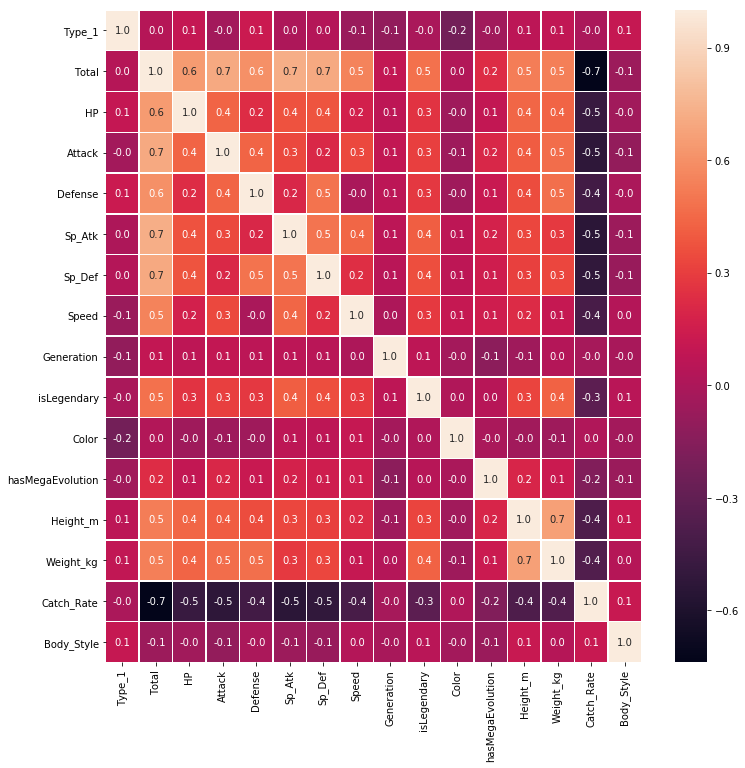

In [7]:
clean_pokemon.corr()
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(clean_pokemon.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

convert_list=["Total","HP","Attack","Defense","Sp_Atk","Sp_Def","Speed","Height_m","Weight_kg","Catch_Rate"]

scaler = MinMaxScaler().fit(clean_pokemon[convert_list])

clean_pokemon_scaled= scaler.transform(clean_pokemon[convert_list])
print(clean_pokemon_scaled[:,0].mean())  # zero (or very close)
print(clean_pokemon_scaled[:,0].std()) 


clean_pokemon[convert_list] = pd.DataFrame(clean_pokemon_scaled,columns= [convert_list])

clean_pokemon.head()

0.4406405712230955
0.2029399901006133


,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,9,0.255556,0.173228,0.27500,0.195556,0.381944,0.214286,0.258065,0,0,3,0,0.042361,0.007159,0.166667,9
1,9,0.416667,0.232283,0.35625,0.257778,0.486111,0.285714,0.354839,0,0,3,0,0.061806,0.013580,0.166667,9
2,9,0.638889,0.311024,0.48125,0.346667,0.625000,0.380952,0.483871,0,0,3,1,0.132639,0.105169,0.166667,9
3,6,0.238889,0.149606,0.29375,0.168889,0.347222,0.142857,0.387097,0,0,7,0,0.035417,0.008843,0.166667,0
4,6,0.416667,0.224409,0.36875,0.235556,0.486111,0.214286,0.483871,0,0,7,0,0.068750,0.019897,0.166667,0


# Classification is Legendary

In [23]:
from sklearn.model_selection import train_test_split

## Machine learning methods modules
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Stastic and evaluate model modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


def model_selection(arg,arg1):
    if arg=="KNN":
        model=skl_nb.KNeighborsClassifier(n_neighbors=arg1)
    
    if arg=="DT":
        model=DecisionTreeClassifier(max_depth=arg1)
        
    if arg=="RF":
        model=RandomForestClassifier(n_estimators=arg1, random_state=7)
        
    model.fit(xTrain,yTrain)
    
    return model

def own_crossvalidation(model,X_train,y_train,argprint):
    scores=cross_val_score(model, X_train,y_train, cv=3)
    
    
    if argprint==1:
        print("3-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)"  \
               % (scores.mean(), scores.std() * 2))

    return scores.mean()

def plot(xrange,yrange,pointx, pointy):
    plt.plot(pointx, pointy,'ro')
    plt.plot(xrange, yrange)
    plt.title('Accuracy for model')
    plt.xlabel('parameter')
    plt.ylabel('Accuracy')
    plt.show()


x = clean_pokemon.drop(columns=['isLegendary'])
y = clean_pokemon['isLegendary'] 

xTrain, yTrain = shuffle(x, y, random_state=0)




KNN: best K is  6


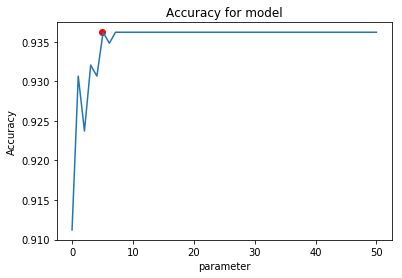

Random Forest: best estimators is  260


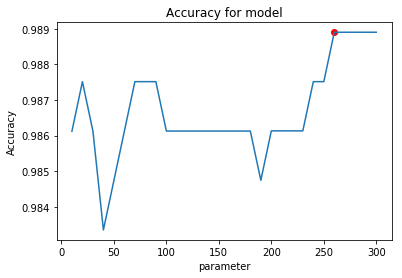

DT: best estimators is  1


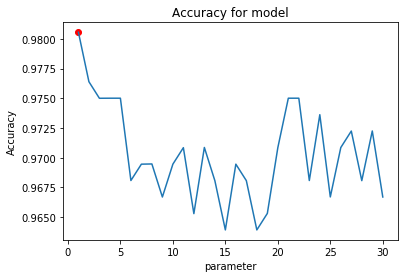

In [24]:
# KNN Tune

# used to score the model accuracy in the process of training
clas_sco = []

## Tune the parameter k -number of neighbors

for k in range(50): 
    model=model_selection("KNN",k+1)
    clas_sco.append(own_crossvalidation(model,xTrain,yTrain,None))
    
K = np.linspace(0, 50, 50)
# the list index begin wiht 0, our variable begin with 1.
print('KNN: best K is ', clas_sco.index(max(clas_sco))+1)
plot(K,clas_sco,clas_sco.index \
          (max(clas_sco)),clas_sco[clas_sco.index(max(clas_sco))])


# Tune RF

clas_sco = []

## Tune the parameter 
## n_estimator-The number of trees in the forest.
c=10
for k in range(30):
    model=model_selection("RF",c)
    clas_sco.append(own_crossvalidation(model,xTrain,yTrain,None))
    c=c+10
    
K = np.linspace(10, 300, 30)
print('Random Forest: best estimators is ', 10*(clas_sco.index(max(clas_sco))+1))
plot(K,clas_sco,10*clas_sco.index(max(clas_sco))+10, \
         clas_sco[clas_sco.index(max(clas_sco))])


# Tune DT

clas_sco = []

## Tune the parameter 
## n_estimator-The number of trees in the forest.
c=1
for k in range(30):
    model=model_selection("DT",c)
    clas_sco.append(own_crossvalidation(model,x,y,None))
    c=c+1
    
K = np.linspace(1, 30, 30)
print('DT: best estimators is ', (clas_sco.index(max(clas_sco))+1))
plot(K,clas_sco,clas_sco.index(max(clas_sco))+1, \
         clas_sco[clas_sco.index(max(clas_sco))])

# Classifcation Type

KNN: best K is  1


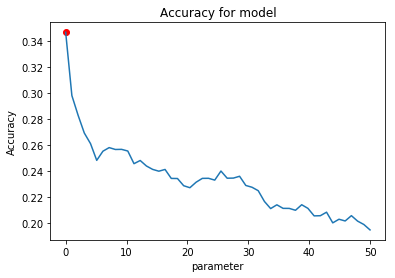

Random Forest: best estimators is  250


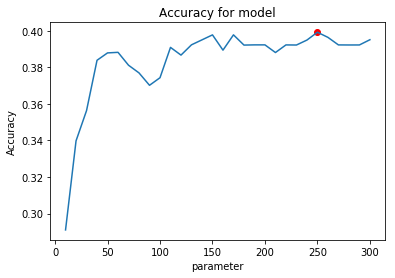

DT: best estimators is  6


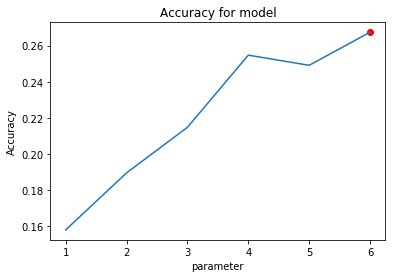

In [25]:
x = clean_pokemon.drop(columns=['Type_1'])
y = clean_pokemon['Type_1'] 

xTrain, yTrain = shuffle(x, y, random_state=0)


# KNN Tune

# used to score the model accuracy in the process of training
clas_sco = []

## Tune the parameter k -number of neighbors

for k in range(50): 
    model=model_selection("KNN",k+1)
    clas_sco.append(own_crossvalidation(model,xTrain,yTrain,None))
    
K = np.linspace(0, 50, 50)
# the list index begin wiht 0, our variable begin with 1.
print('KNN: best K is ', clas_sco.index(max(clas_sco))+1)
plot(K,clas_sco,clas_sco.index \
          (max(clas_sco)),clas_sco[clas_sco.index(max(clas_sco))])


# Tune RF

clas_sco = []

## Tune the parameter 
## n_estimator-The number of trees in the forest.
c=10
for k in range(30):
    model=model_selection("RF",c)
    clas_sco.append(own_crossvalidation(model,xTrain,yTrain,None))
    c=c+10
    
K = np.linspace(10, 300, 30)
print('Random Forest: best estimators is ', 10*(clas_sco.index(max(clas_sco))+1))
plot(K,clas_sco,10*clas_sco.index(max(clas_sco))+10, \
         clas_sco[clas_sco.index(max(clas_sco))])


# Tune DT

clas_sco = []

## Tune the parameter 
## n_estimator-The number of trees in the forest.
c=1
for k in range(6):
    model=model_selection("DT",c)
    clas_sco.append(own_crossvalidation(model,x,y,None))
    c=c+1
    
K = np.linspace(1, 6, 6)
print('DT: best estimators is ', (clas_sco.index(max(clas_sco))+1))
plot(K,clas_sco,clas_sco.index(max(clas_sco))+1, \
         clas_sco[clas_sco.index(max(clas_sco))])

# Clustering

In [26]:
clean_pokemon.head()

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,9,0.255556,0.173228,0.27500,0.195556,0.381944,0.214286,0.258065,0,0,3,0,0.042361,0.007159,0.166667,9
1,9,0.416667,0.232283,0.35625,0.257778,0.486111,0.285714,0.354839,0,0,3,0,0.061806,0.013580,0.166667,9
2,9,0.638889,0.311024,0.48125,0.346667,0.625000,0.380952,0.483871,0,0,3,1,0.132639,0.105169,0.166667,9
3,6,0.238889,0.149606,0.29375,0.168889,0.347222,0.142857,0.387097,0,0,7,0,0.035417,0.008843,0.166667,0
4,6,0.416667,0.224409,0.36875,0.235556,0.486111,0.214286,0.483871,0,0,7,0,0.068750,0.019897,0.166667,0


In [27]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [28]:
data = clean_pokemon.drop(columns=['Type_1'])

pca = PCA(n_components=6).fit(data)
data2d = pca.transform(data)

# kmeans = KMeans(n_clusters=4)
# kmeans.fit(X)
# y_kmeans = kmeans.predict(X)

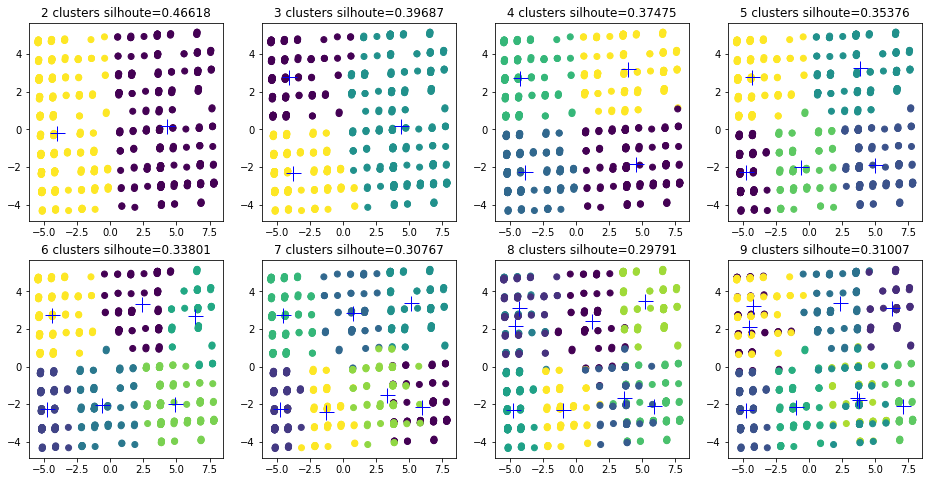

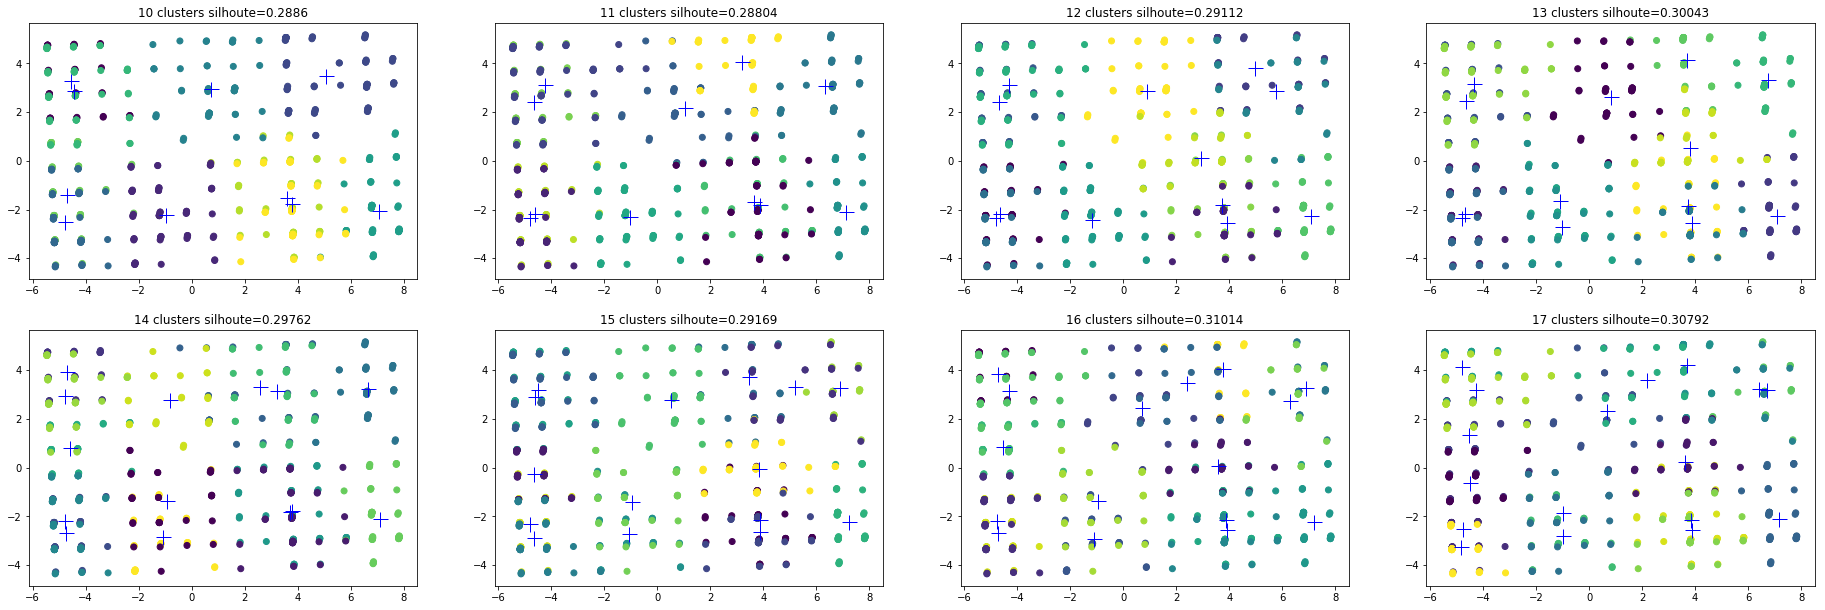

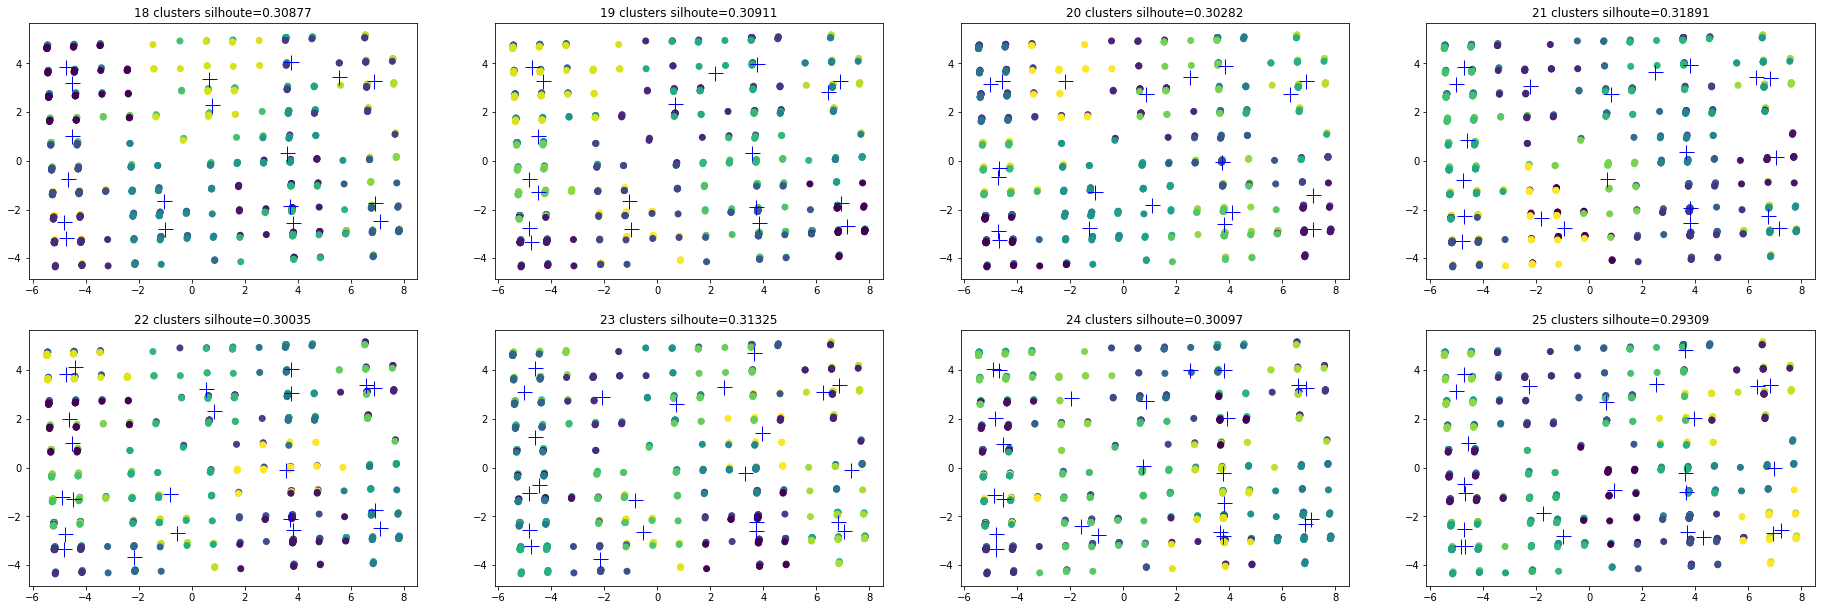

In [29]:
sil_score=[]

plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(data)
    scores.append(kmean.score(data))
    n_clusters.append(i)
    pred = kmean.predict(data)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"{i} clusters silhoute={np.round(silhouette_score(data, pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred)
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)
    sil_score.append(np.round(silhouette_score(data, pred), decimals=5))
    
plt.figure(figsize=(32, 16))
for i in range(2, 10):
    kmean = KMeans(n_clusters = 8 + i).fit(data)
    scores.append(kmean.score(data))
    n_clusters.append(i)
    pred = kmean.predict(data)
    preds.append(pred)
    plt.subplot(3, 4, i - 1)
    plt.title(f"{i+8} clusters silhoute={np.round(silhouette_score(data, pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred)
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)
    sil_score.append(np.round(silhouette_score(data, pred), decimals=5))
    
plt.figure(figsize=(32, 16))
for i in range(2, 10):
    kmean = KMeans(n_clusters = 16 + i).fit(data)
    scores.append(kmean.score(data))
    n_clusters.append(i)
    pred = kmean.predict(data)
    preds.append(pred)
    plt.subplot(3, 4, i - 1)
    plt.title(f"{i+16} clusters silhoute={np.round(silhouette_score(data, pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred)
    
    centroids = kmean.cluster_centers_
    centroids2d = pca.transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)
    sil_score.append(np.round(silhouette_score(data, pred), decimals=5))

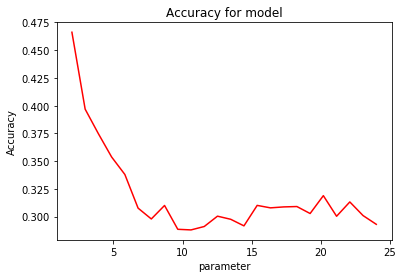

In [30]:
xrange=np.linspace(2, 24, 24)
plt.plot(xrange, sil_score,'r')
plt.title('Accuracy for model')
plt.xlabel('parameter')
plt.ylabel('Accuracy')
plt.show()

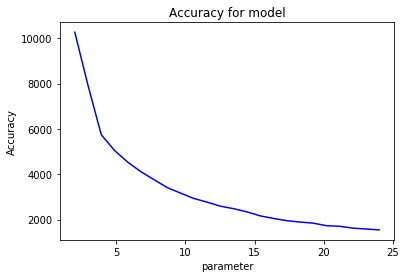

In [31]:
xrange=np.linspace(2, 24, 24)
plt.plot(xrange, -np.array(scores),'b')

plt.title('Accuracy for model')
plt.xlabel('parameter')
plt.ylabel('Accuracy')
plt.show()

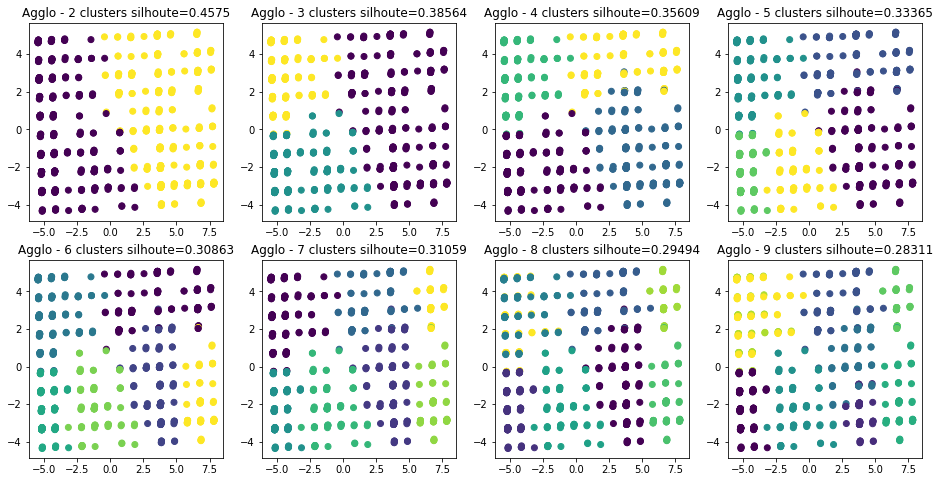

In [32]:
sil_score_agg=[]
plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    agglo = AgglomerativeClustering(n_clusters = i)
#     scores.append(agglo.score(data))
    n_clusters.append(i)
    pred = agglo.fit_predict(data)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"Agglo - {i} clusters silhoute={np.round(silhouette_score(data, pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred)
    sil_score_agg.append(np.round(silhouette_score(data, pred), decimals=5))


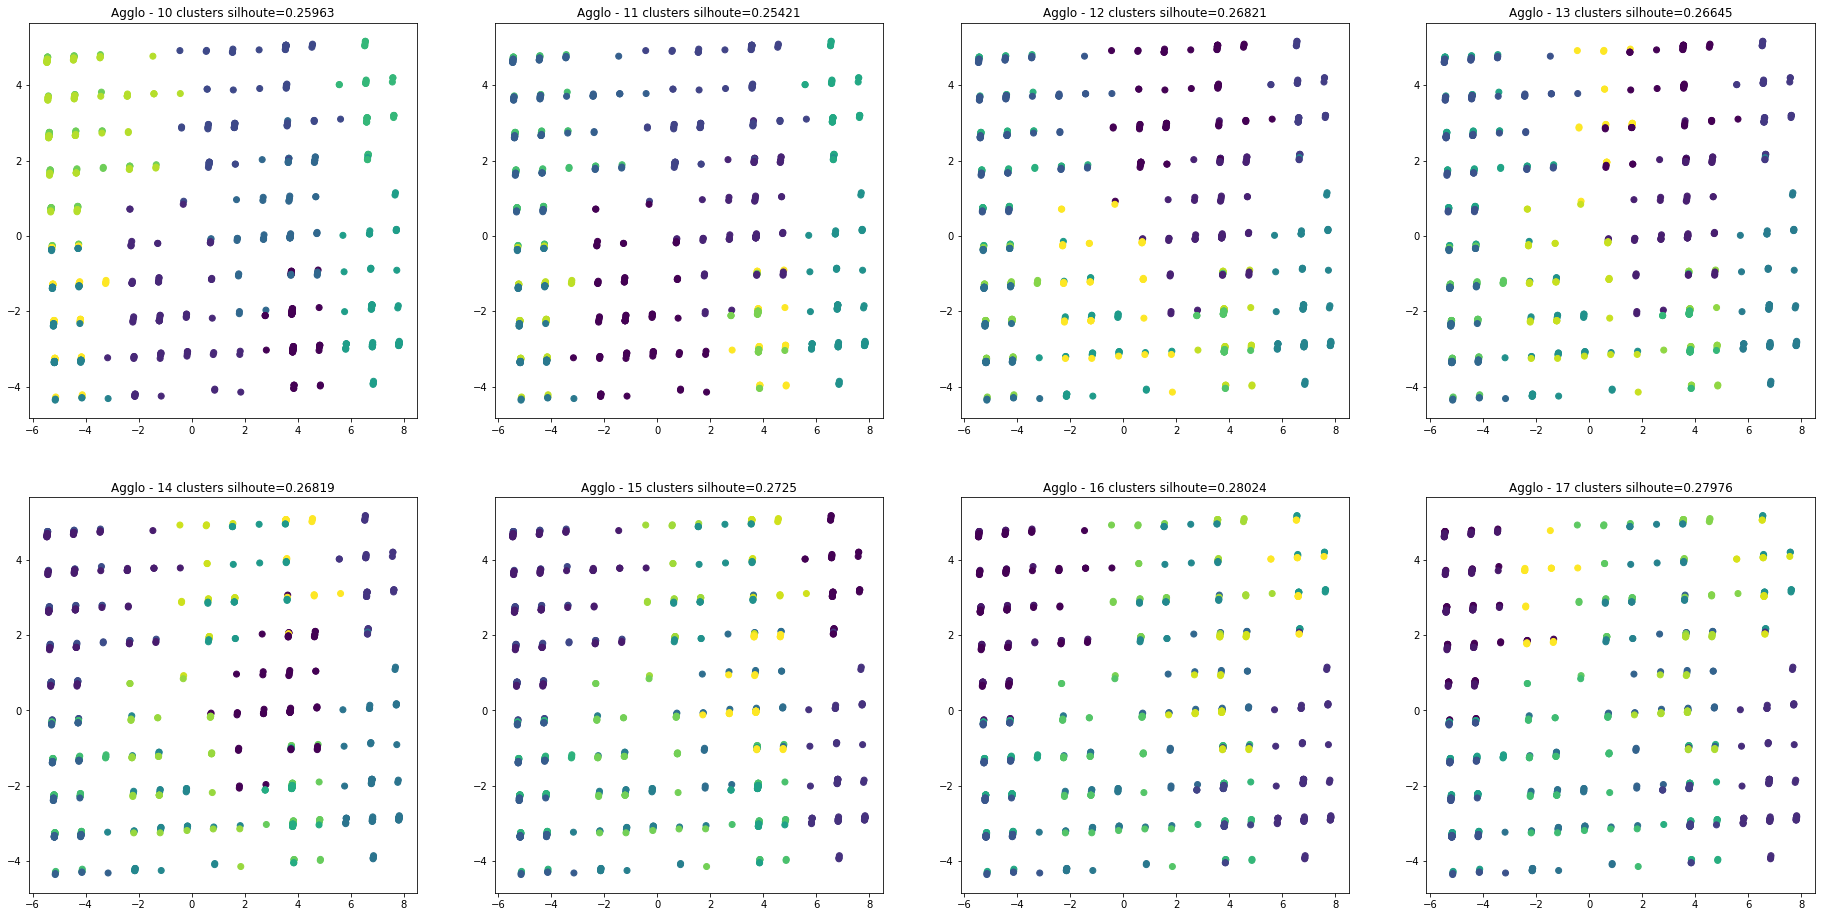

In [33]:
plt.figure(figsize=(32, 16))
for i in range(2, 10):
    agglo = AgglomerativeClustering(n_clusters = i+8)
#     scores.append(agglo.score(data))
    n_clusters.append(i)
    pred = agglo.fit_predict(data)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"Agglo - {i+8} clusters silhoute={np.round(silhouette_score(data, pred), decimals=5)}")
    plt.scatter(data2d[:, 0], data2d[:, 1], c=pred)
    sil_score_agg.append(np.round(silhouette_score(data, pred), decimals=5))

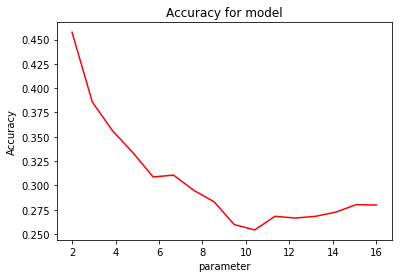

In [34]:
xrange=np.linspace(2, 16, 16)
plt.plot(xrange, sil_score_agg,'r')
plt.title('Accuracy for model')
plt.xlabel('parameter')
plt.ylabel('Accuracy')
plt.show()